In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.3.0'

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape

4423680/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(train_labels)

60000

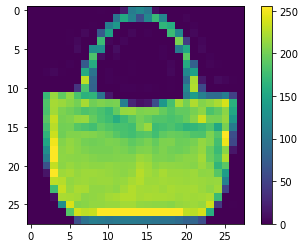

In [9]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

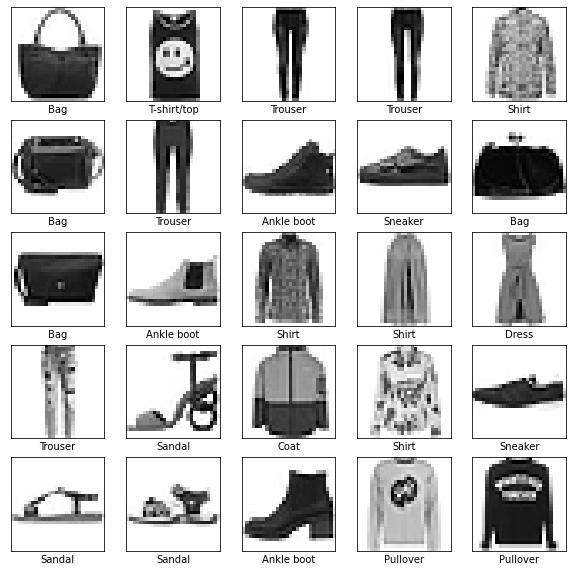

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i+100], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i+100]])
plt.show()

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(10)
    ])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5039 - accuracy: 0.8239
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3756 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3365 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3145 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2960 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2805 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2667 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2555 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2484 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.238

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3710 - accuracy: 0.8744

Test accuracy: 0.8744000196456909


In [15]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

array([3.2819944e-08, 2.2408381e-08, 4.1476484e-09, 7.0705304e-09,
       7.8545487e-10, 1.8621318e-04, 2.2738752e-07, 7.7904344e-02,
       3.5681680e-08, 9.2190915e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
test_labels[0]

9

In [18]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label], color=color))

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

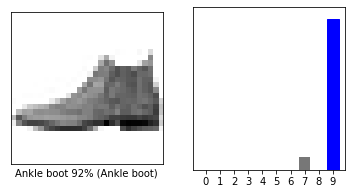

In [19]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

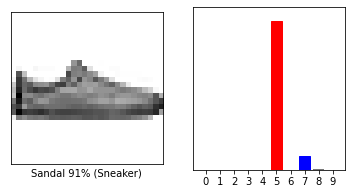

In [26]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

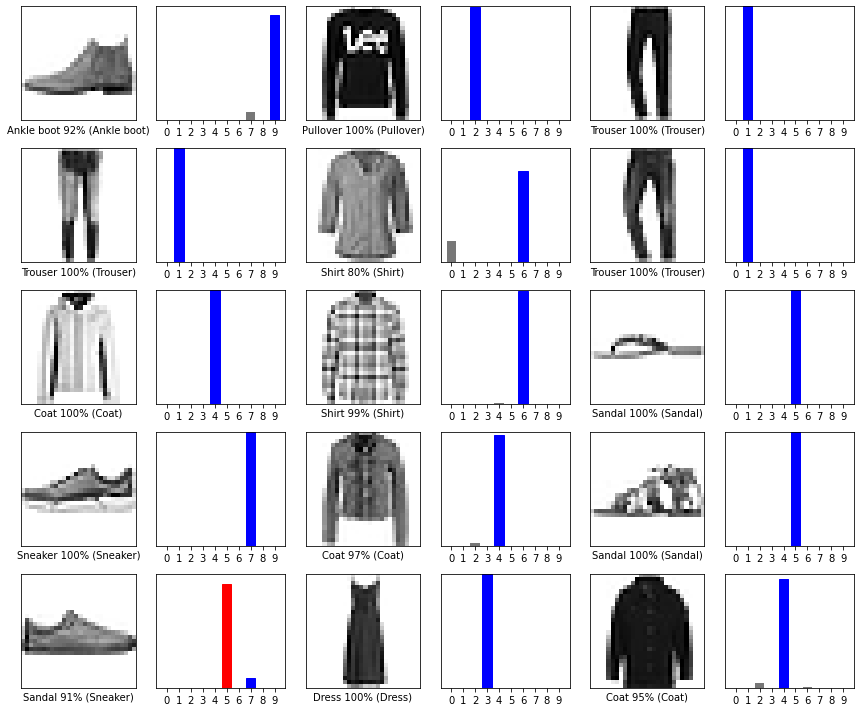

In [21]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [27]:
img = test_images[12]
print(img.shape)

(28, 28)


In [28]:
img = np.expand_dims(img, 0)
print(img.shape)

(1, 28, 28)


In [29]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[1.78740915e-08 7.94718105e-08 6.42314362e-08 1.06450715e-08
  7.73914977e-08 9.11974430e-01 1.59515192e-08 8.57302845e-02
  2.29501026e-03 1.22745703e-07]]


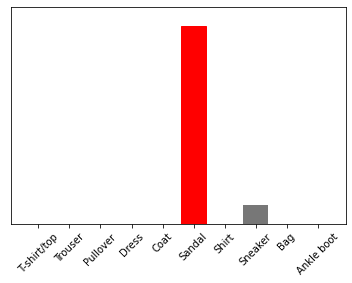

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [31]:
np.argmax(predictions_single[0])

5

In [32]:
test_labels[12]

7